In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: title={'center': 'Total number of people having diabetes'}, ylabel='count'>

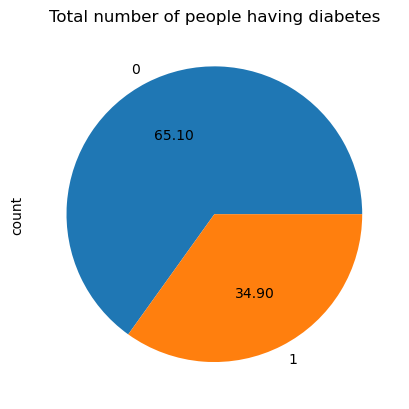

In [7]:
plt.title("Total number of people having diabetes")
df["Outcome"].value_counts().plot(kind="pie",autopct="%0.2f")

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.groupby("Outcome").mean()["Age"]

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64

<Axes: title={'center': 'Average age of people having diabetes'}, xlabel='Outcome'>

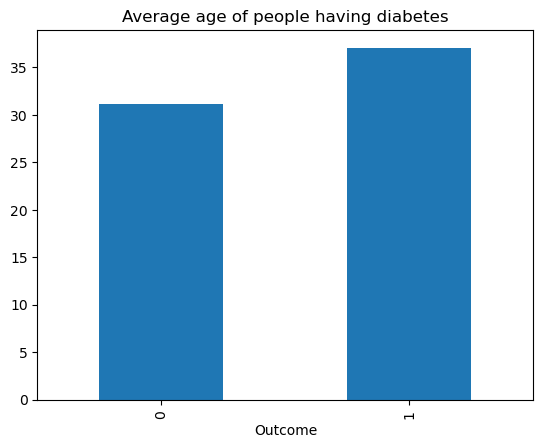

In [11]:
plt.title("Average age of people having diabetes")
df.groupby("Outcome").mean()["Age"].plot(kind="bar")

<Axes: title={'center': 'Average bmi of people having diabetes'}, xlabel='Outcome'>

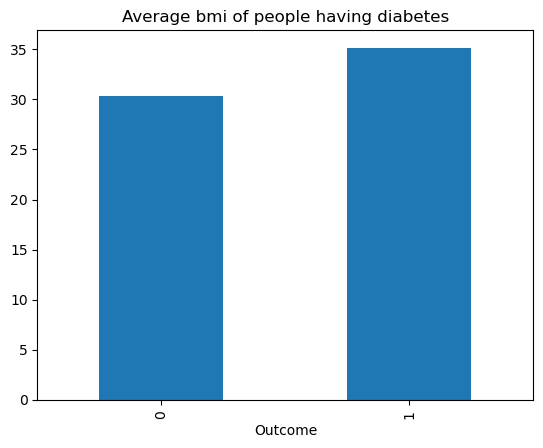

In [12]:
plt.title("Average bmi of people having diabetes")
df.groupby("Outcome").mean()["BMI"].plot(kind="bar")

<Axes: title={'center': 'Average insulin levels of people having diabetes'}, xlabel='Outcome'>

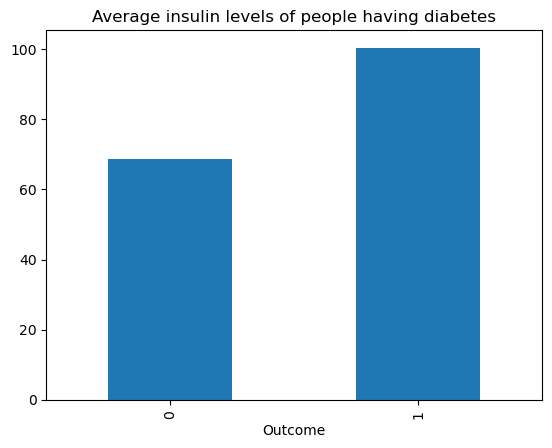

In [13]:
plt.title("Average insulin levels of people having diabetes")
df.groupby("Outcome").mean()["Insulin"].plot(kind="bar")

<Axes: title={'center': 'Average Skin Thickness of people having diabetes'}, xlabel='Outcome'>

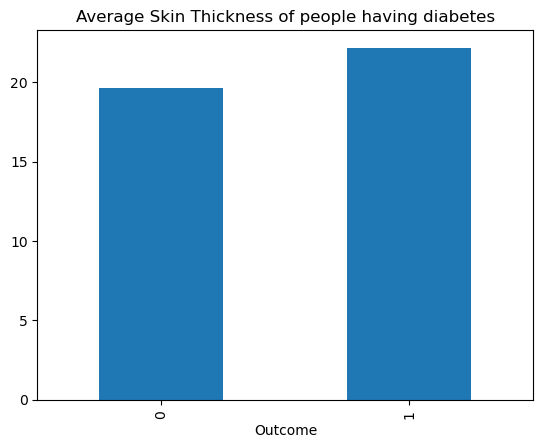

In [14]:
plt.title("Average Skin Thickness of people having diabetes")
df.groupby("Outcome").mean()["SkinThickness"].plot(kind="bar")

<Axes: title={'center': 'Average blood Pressure of people having diabetes'}, xlabel='Outcome'>

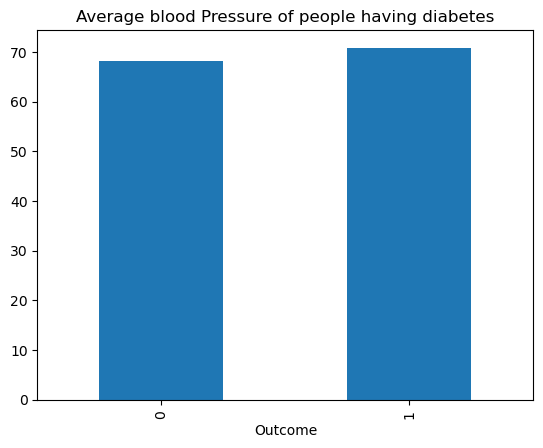

In [16]:
plt.title("Average blood Pressure of people having diabetes")
df.groupby("Outcome").mean()["BloodPressure"].plot(kind="bar")

<Axes: title={'center': 'Average Glucose levels  of people having diabetes'}, xlabel='Outcome'>

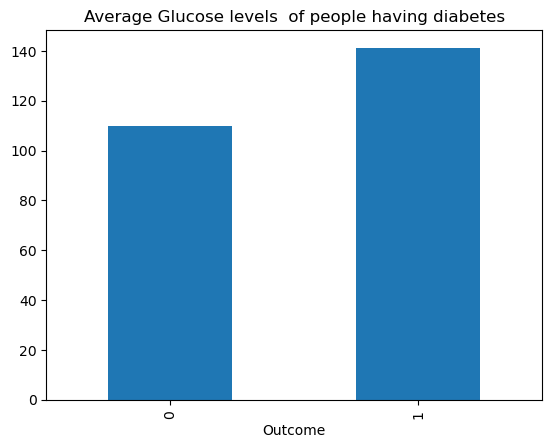

In [17]:
plt.title("Average Glucose levels  of people having diabetes")
df.groupby("Outcome").mean()["Glucose"].plot(kind="bar")

In [18]:
df["Pregnancies"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

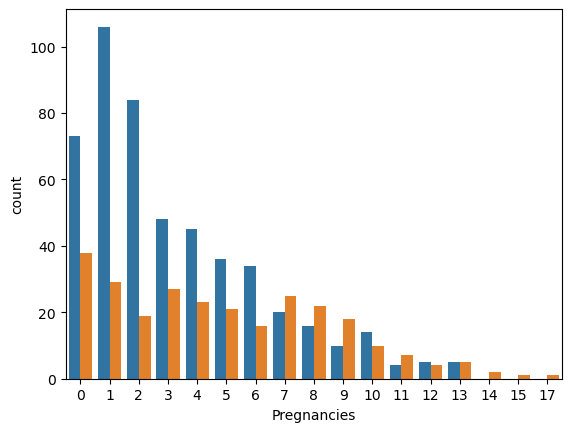

In [19]:
sn.countplot(data=df,x="Pregnancies",hue="Outcome")

<Axes: title={'center': 'Average number of pregnancies  of people having diabetes'}, xlabel='Outcome'>

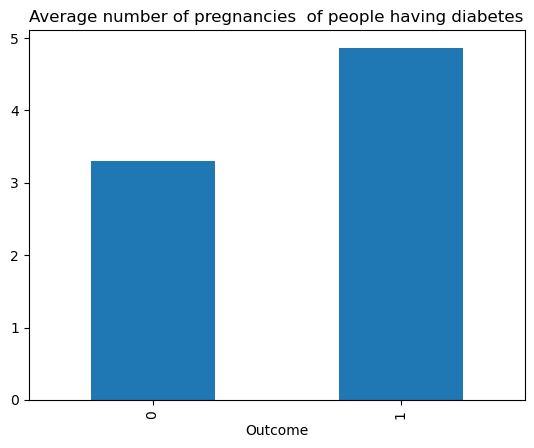

In [20]:
plt.title("Average number of pregnancies  of people having diabetes")
df.groupby("Outcome").mean()["Pregnancies"].plot(kind="bar")

# Feature Engineering


### Uisng Correlation Matrix

In [22]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

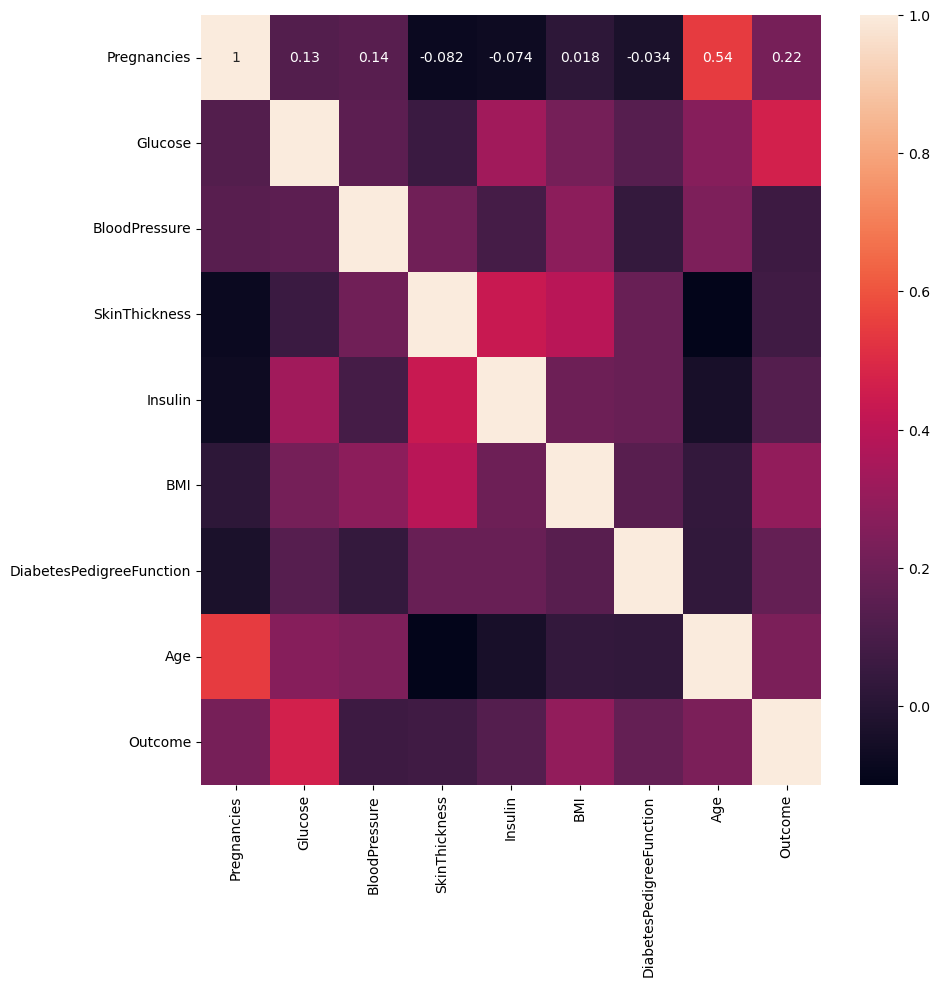

In [24]:
plt.figure(figsize=(10,10))
sn.heatmap(df.corr(),annot=True)

### Using Extra Tree Selector

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

In [29]:
x=df.loc[:,df.columns!="Outcome"]

In [30]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [31]:
y=df["Outcome"]

In [33]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [34]:
x=pd.DataFrame(MinMaxScaler().fit(x).transform(x))

In [35]:
x.head()

,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [40]:
etc=ExtraTreesClassifier()

In [42]:
etc.fit(x,y)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
cols=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
features_imp=pd.Series(etc.feature_importances_,index=cols)

In [48]:
features_imp

Pregnancies                 0.109434
Glucose                     0.229348
BloodPressure               0.101779
SkinThickness               0.079869
Insulin                     0.071148
BMI                         0.148005
DiabetesPedigreeFunction    0.117634
Age                         0.142782
dtype: float64

<Axes: >

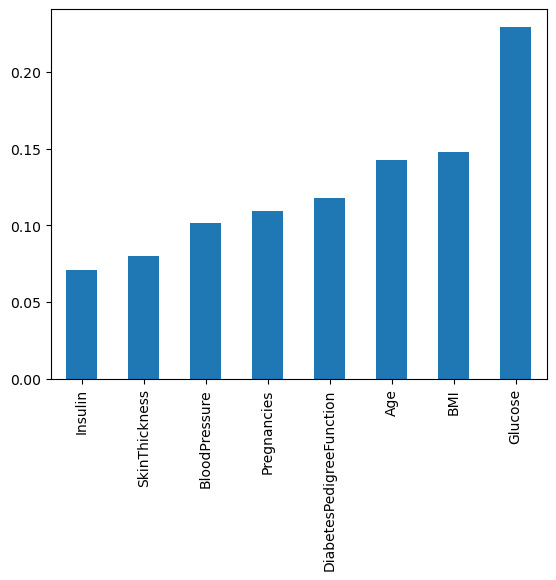

In [49]:
features_imp.sort_values().plot(kind="bar")

#### From ETC we have infered that The outcome depends largely on the glucose levels of the body .It also dependent ona person being fit and having a healthy bmi .Age also plays a imp role in deciding the outcome 

# Select K best Method

In [50]:
from sklearn.feature_selection import SelectKBest

In [51]:
from sklearn.feature_selection import chi2

In [55]:
bestfeatures = SelectKBest(score_func=chi2, k =df.shape[1]-1).fit(x, y)

In [57]:
bestfeatures.scores_

array([6.5599818 , 7.09490975, 0.14430634, 0.53644485, 2.57159016,
       1.90267278, 2.75858391, 8.20569067])

In [58]:
cols=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
bestfeature=pd.Series(bestfeatures.scores_,index=cols)

In [60]:
bestfeature

Pregnancies                 6.559982
Glucose                     7.094910
BloodPressure               0.144306
SkinThickness               0.536445
Insulin                     2.571590
BMI                         1.902673
DiabetesPedigreeFunction    2.758584
Age                         8.205691
dtype: float64

<Axes: >

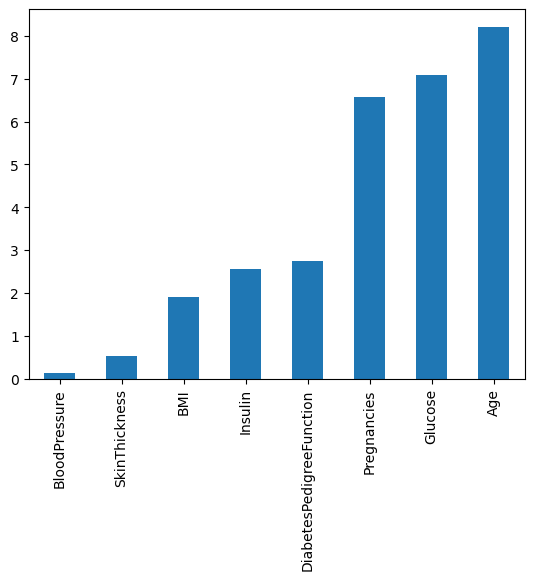

In [61]:
bestfeature.sort_values().plot(kind="bar")

# iNPUT AND oUTPUT 

In [62]:
X=df.loc[:,df.columns!="Outcome"]

In [63]:
Y=df["Outcome"]

In [64]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [65]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Scaling the input and outpout

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
ss=StandardScaler()

In [68]:
x=ss.fit(x).transform(x)

In [70]:
print(x)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


Dividing the data

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [73]:
x_train.shape

(537, 8)

In [75]:
x_test.shape

(231, 8)

In [76]:
y_train.shape

(537,)

In [77]:
y_test.shape

(231,)

# Models

### SVM

In [81]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [82]:
svc=SVC()

In [83]:
svc.fit(x_train,y_train)

SVC()

In [84]:
predict_svc=svc.predict(x_test)

In [85]:
pa_svc=accuracy_score(predict_svc,y_test)

In [86]:
pa_svc

0.7489177489177489

# Model Prediction using SVC

In [171]:
row2=df.loc[3,:]
row2

Pregnancies                  1.000
Glucose                     89.000
BloodPressure               66.000
SkinThickness               23.000
Insulin                     94.000
BMI                         28.100
DiabetesPedigreeFunction     0.167
Age                         21.000
Outcome                      0.000
Name: 3, dtype: float64

In [172]:
pred=np.asarray(row2.values)

In [173]:
pred

array([ 1.   , 89.   , 66.   , 23.   , 94.   , 28.1  ,  0.167, 21.   ,
        0.   ])

In [174]:
pred=np.delete(pred,pred.size-1)

In [175]:
pred

array([ 1.   , 89.   , 66.   , 23.   , 94.   , 28.1  ,  0.167, 21.   ])

In [176]:
pred=pred.reshape(-1,1)
pred_scaled=ss.transform(pred)

In [177]:
pred_scaled

array([[-0.65034748],
       [ 0.86083054],
       [ 0.46586356],
       [-0.27255298],
       [ 0.94669292],
       [-0.18497334],
       [-0.66465215],
       [-0.30689793]])

In [178]:
pred_scaled=pred_scaled.reshape(1,-1)

In [179]:
pred_scaled.shape

(1, 8)

In [180]:
x_train.shape

(537, 8)

In [181]:
ans=svc.predict(pred_scaled)

In [182]:
if(ans==0):
    print(" the person is not Diabetic")
else:
    print("The person is diabetic")

 the person is not Diabetic
